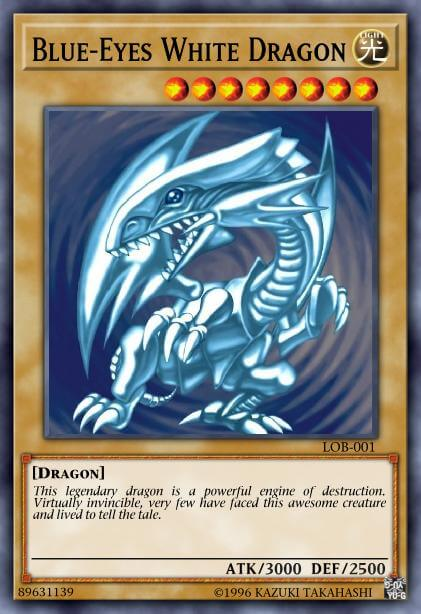

In [5]:
import requests
import pandas as pd
# No es estrictamente necesario pero sirve para la imágen final
from IPython.display import Image

#Podés reemplazar el path y la hoja por lo que necesites
dfCartas = pd.read_excel("C:/Python/Cartasaobtener.xlsx","Sheet1")

listaCartas = dfCartas["Nombre"].to_list()

#Hay que armar la lista de cartas. Desconozco cuántas acepta.
strAppend = ""

for carta in listaCartas:
    strAppend = strAppend + carta + "|"

strAppend = strAppend.removesuffix('|')

#Hacemos el llamado
url = f"https://db.ygoprodeck.com/api/v7/cardinfo.php?name={strAppend}"
response = requests.get(url)
data = response.json()
card_data = pd.DataFrame(data["data"])

#Voy a utilizar normalmente solo una imagen para mostrar en Power BI, por lo que esto es particularmente útil.
card_data["main_image"] = card_data['card_images'].apply(lambda x: x[0]["image_url"])

#Podés reemplazar el path por lo que necesites
card_data.to_excel("C:/Python/cartas.xlsx")

Image(card_data['main_image'].iloc[0])
